In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy, matplotlib.pyplot as plt
from pathlib import Path
import mir_utils as miru
import feature_functions as ff
import scipy
import madmom
import time
import os
import librosa, librosa.display

### Testing out power spectrums

(1025, 24)


Text(0.5,1,'Log-frequency power spectrogram')

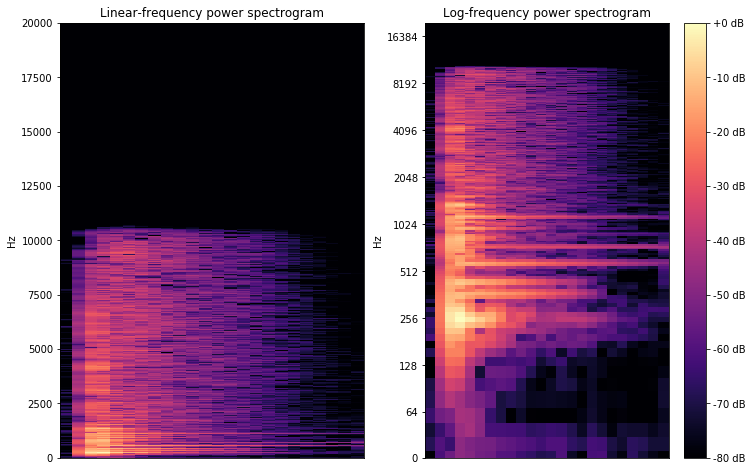

In [9]:
filename= "./samples/snares/snare_02.mp3"
y, sr = librosa.load(filename,sr=40000)
# Or generate 
tone = librosa.tone(4096, sr=40000, duration=1)
# y=tone
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
print(D.shape)
plt.figure(figsize=(12,8))
plt.subplot(1, 2, 1)
librosa.display.specshow(D,sr=40000,y_axis='linear')
# plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')
# Or on a logarithmic scale
plt.subplot(1, 2, 2)
librosa.display.specshow(D,sr=40000, y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Log-frequency power spectrogram')

### What's the difference between power, amplitude and decibels? 

/home/amir/.local/lib/python3.6/site-packages/numpy/core/numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


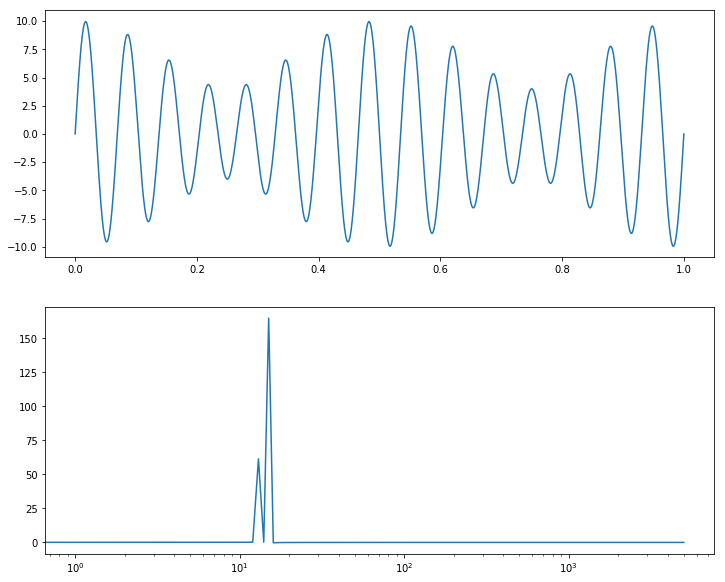

In [10]:
import numpy as np
import matplotlib.pyplot as plt


def pltArray(frequencies,amps):
    plt.semilogx(frequencies[:len(frequencies)//2], amps[:len(np_fft)//2])

t0 = 0
t1 = 1
n_samples = 10000

plt.figure(figsize=(12,10))
xs = np.linspace(t0, t1, n_samples)
ys = 7*np.sin(15 * 2 * np.pi * xs) + 3*np.sin(13 * 2 * np.pi * xs)

plt.subplot(2, 1, 1)
plt.plot(xs,ys)

np_fft = np.fft.fft(ys)
amplitudes = 2/n_samples * np.abs(np_fft) 
frequencies = np.fft.fftfreq(n_samples) * n_samples * 1/(t1-t0)

plt.subplot(2, 1, 2)
pltArray(frequencies,np_fft)
plt.show()

In [11]:
np_fft.shape,np_fft

((10000,), array([7.09293735e-14+0.j        , 2.20168252e-04-0.70081729j,
        8.93968985e-04-1.42279564j, ..., 2.06339410e-03+2.18932849j,
        8.93968985e-04+1.42279564j, 2.20168252e-04+0.70081729j]))

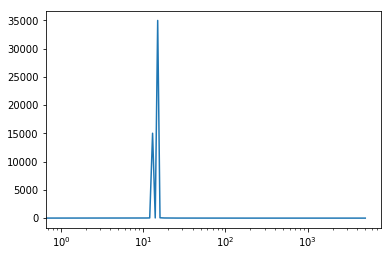

In [12]:
amplitudes.shape,amplitudes
pltArray(frequencies,amp)

((10000,), array([7.09293735e-14, 7.00817324e-01, 1.42279592e+00, ...,
        2.18932946e+00, 1.42279592e+00, 7.00817324e-01]))

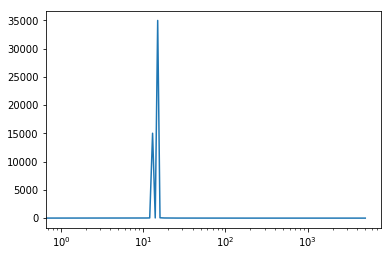

In [17]:
amp=np.abs(np_fft)
pltArray(frequencies,amp)
amp.shape,amp

((10000,), array([10.87829958, 10.87829958, 10.87829958, ..., 10.87829958,
        10.87829958, 10.87829958]))

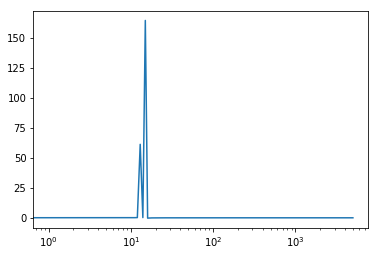

In [14]:
db=librosa.amplitude_to_db(amp)
pltArray(frequencies,np_fft)
db.shape,db

((10000,), array([10.87829958, 10.87829958, 10.87829958, ..., 10.87829958,
        10.87829958, 10.87829958]), 90.87829958013172, 1224136811.6153636, 34987.6665643104)

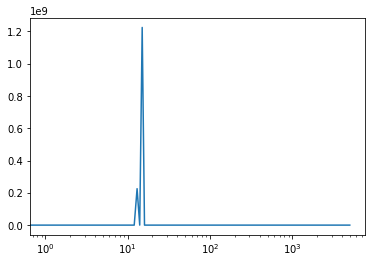

In [15]:
power=librosa.db_to_power(db)
pltArray(frequencies,power)
db.shape,db,np.max(db),np.max(power),np.max(amp)